In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
    df=pd.read_csv(r"C:\Users\Administrator\Desktop\israel_palestine_conflict.csv")

In [3]:
df.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,DECEMBER,781,NaN,51,8
1,2000,NOVEMBER,3838,NaN,112,22
2,2000,OCTOBER,5984,NaN,104,10
3,2000,SEPTEMBER,NaN,NaN,16,1
4,2001,DECEMBER,304,NaN,67,36


In [4]:
df.tail()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
244,2021,JANUARY,NaN,NaN,4,0
245,2021,FEBRUARY,NaN,NaN,1,0
246,2021,MARCH,NaN,NaN,4,0
247,2021,APRIL,NaN,NaN,1,0
248,2021,MAY,NaN,NaN,26,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   249 non-null    int64 
 1   Month                  249 non-null    object
 2   Palestinians Injuries  195 non-null    object
 3   Israelis Injuries      132 non-null    object
 4   Palestinians Killed    249 non-null    int64 
 5   Israelis Killed        249 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 11.8+ KB


In [6]:
df.describe()

,Year,Palestinians Killed,Israelis Killed
count,249.000000,249.000000,249.000000
mean,2010.542169,40.160643,5.120482
std,6.014702,129.148851,11.653323
min,2000.000000,0.000000,0.000000
25%,2005.000000,4.000000,0.000000
50%,2011.000000,12.000000,1.000000
75%,2016.000000,37.000000,5.000000
max,2021.000000,1590.000000,122.000000


In [7]:
columns_to_clean = [ 'Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']

for col in columns_to_clean:
    df[col] = df[col].apply(lambda x: pd.to_numeric(str(x).replace(',',''), errors='coerce'))

In [8]:
df.isna().sum()

Year                       0
Month                      0
Palestinians Injuries     56
Israelis Injuries        119
Palestinians Killed        0
Israelis Killed            0
dtype: int64

In [9]:
df[['Palestinians Injuries','Israelis Injuries']] = df[['Palestinians Injuries','Israelis Injuries']].fillna(0)

In [10]:
df['Month'] = df['Month'].str.upper()
df['Month'] = df['Month'].str.extract(r'([A-Z]+)')
df['Month'] = df['Month'].str.capitalize()
df['date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str), format='%B %Y', errors='coerce')
df = df.sort_values('date')


In [11]:
df[df['date'].isna()]

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed,date


In [12]:
df.drop(['Month', 'Year'], axis=1, inplace=True)

In [13]:
print("Total Plaestinians Injuries:",df['Palestinians Injuries'].sum())
print("Total Israelis Injuries:",df['Israelis Injuries'].sum())
print("Total Plaestinians Killed:",df['Palestinians Killed'].sum())
print("Total Israelis Killed:",df['Israelis Killed'].sum())

Total Plaestinians Injuries: 111475.0
Total Israelis Injuries: 5160.0
Total Plaestinians Killed: 10000
Total Israelis Killed: 1275


## Monthly Injuries Over Time

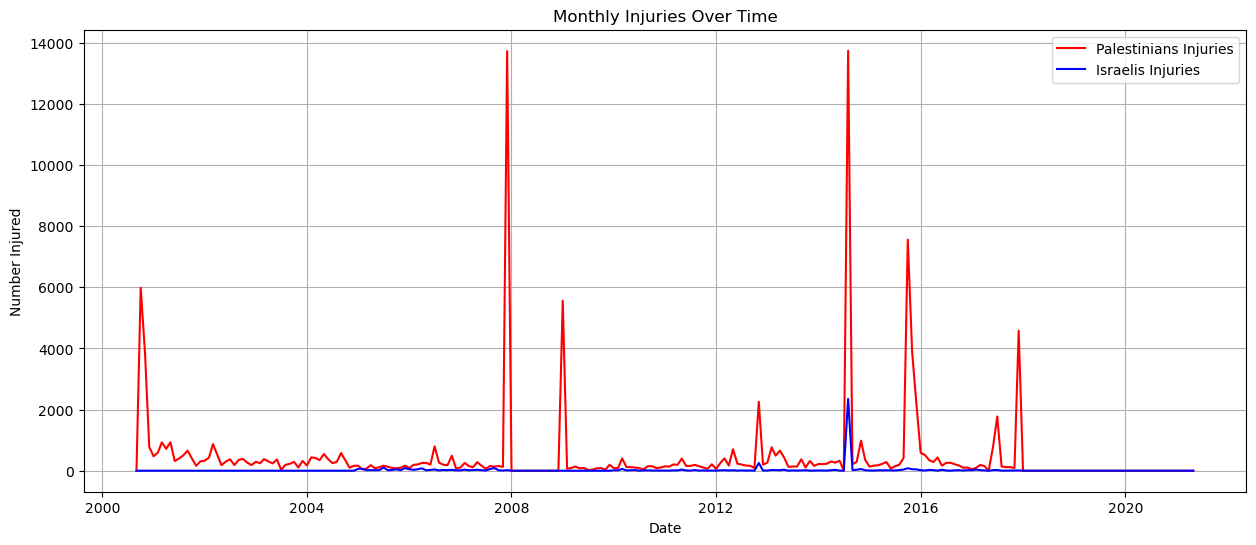

In [14]:
plt.figure(figsize=(15,6))
plt.plot(df['date'],df['Palestinians Injuries'], label= 'Palestinians Injuries', color='red')
plt.plot(df['date'],df['Israelis Injuries'], label= 'Israelis Injuries', color='blue')
plt.title('Monthly Injuries Over Time')
plt.xlabel('Date')
plt.ylabel('Number Injured')
plt.legend()
plt.grid(True)
plt.show()

## Monthly Deaths Over Time

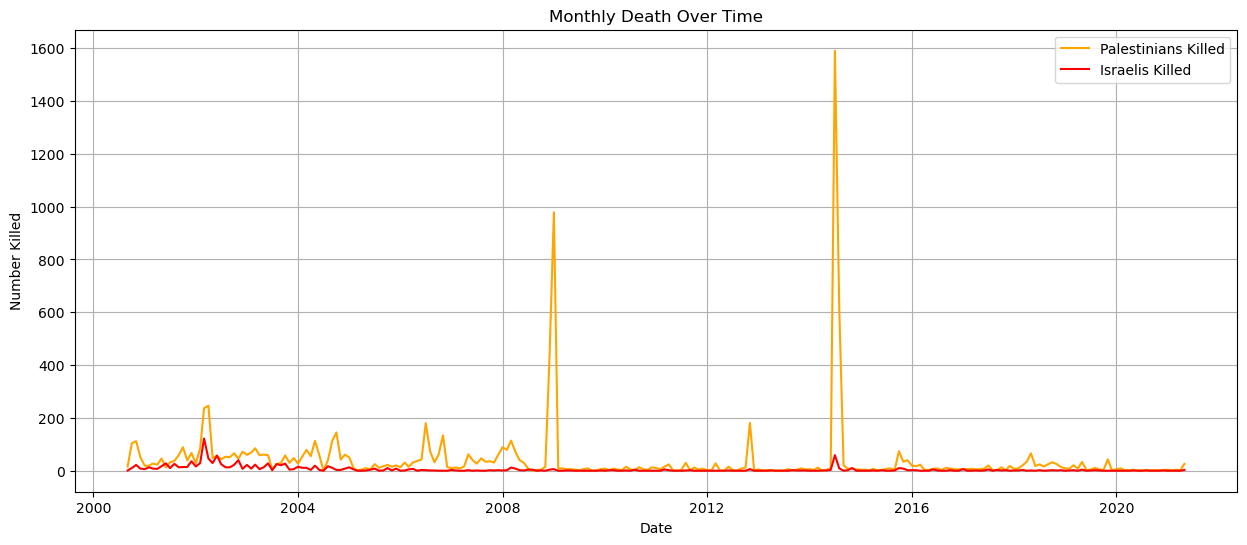

In [15]:
plt.figure(figsize=(15,6))
plt.plot(df['date'],df['Palestinians Killed'], label= 'Palestinians Killed', color='orange')
plt.plot(df['date'],df['Israelis Killed'], label= 'Israelis Killed', color='red')
plt.title('Monthly Death Over Time')
plt.xlabel('Date')
plt.ylabel('Number Killed')
plt.legend()
plt.grid(True)
plt.show()

## Total Injuries

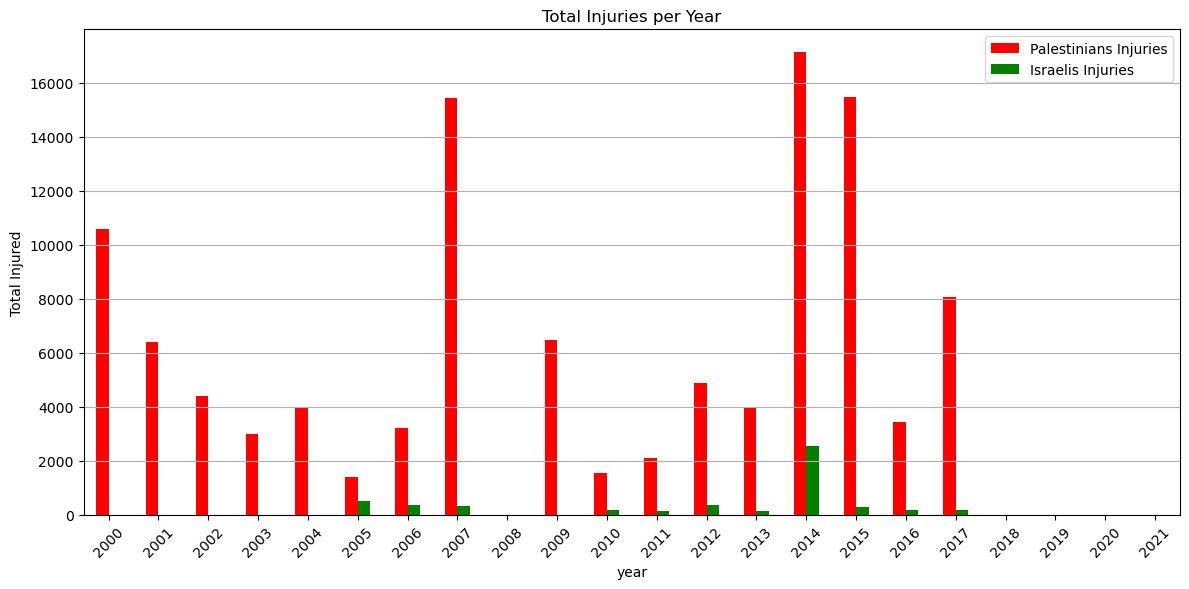

In [16]:
df['year'] = pd.to_datetime(df['date']).dt.year
yearly_injuries = df.groupby('year')[['Palestinians Injuries', 'Israelis Injuries']].sum()

yearly_injuries.plot(kind='bar', figsize=(12,6), color= ['red', 'green'])
plt.title("Total Injuries per Year")
plt.ylabel('Total Injured')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Total Killed

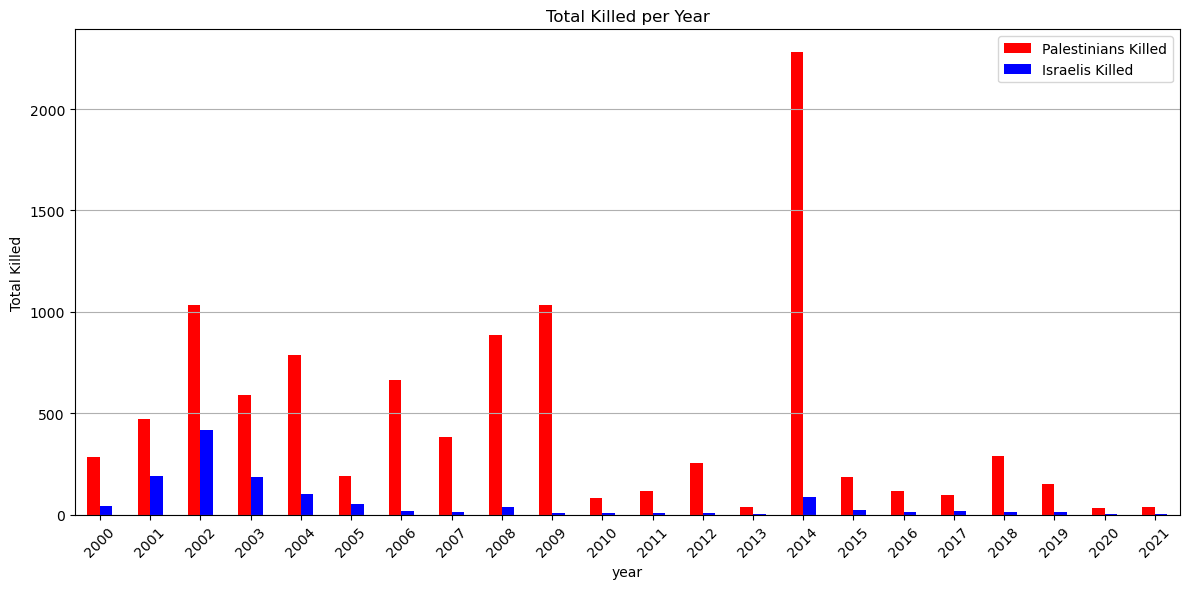

In [17]:
df['year'] = pd.to_datetime(df['date']).dt.year
yearly_Killed = df.groupby('year')[['Palestinians Killed', 'Israelis Killed']].sum()

yearly_Killed.plot(kind='bar', figsize=(12,6), color= ['red', 'blue'])
plt.title("Total Killed per Year")
plt.ylabel('Total Killed')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [18]:
total_injuries = [df['Palestinians Injuries'].sum(), df['Israelis Injuries'].sum()]

In [19]:
total_Killed = [df['Palestinians Killed'].sum(), df['Israelis Killed'].sum()]

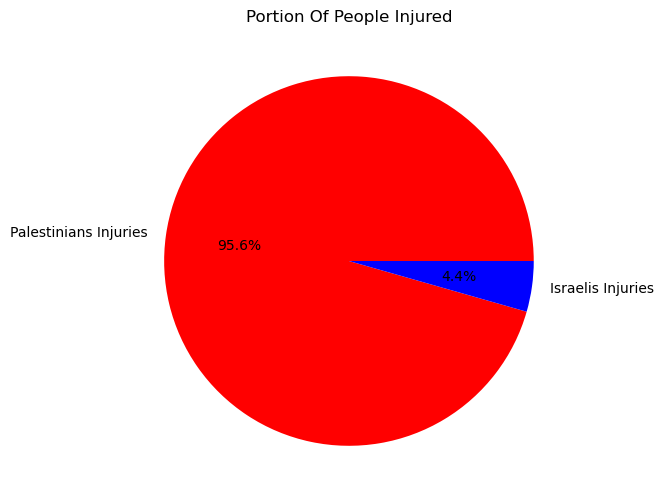

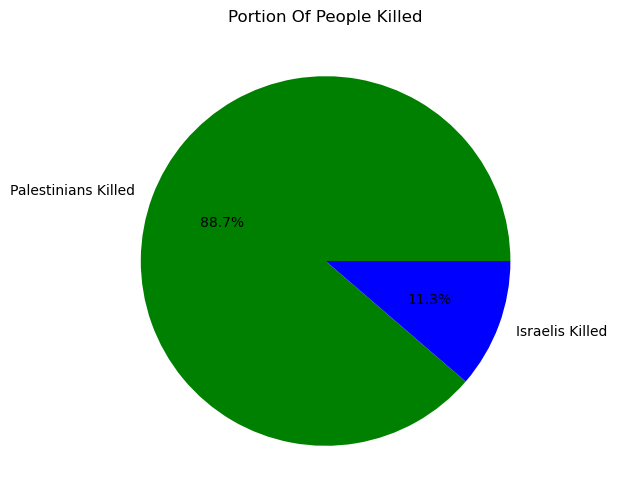

In [20]:
plt.figure(figsize=(12,6))
plt.pie(total_injuries, labels = ['Palestinians Injuries', 'Israelis Injuries'], autopct='%1.1f%%', colors=['red','blue'])
plt.title('Portion Of People Injured')
plt

plt.figure(figsize=(12,6))
plt.pie(total_Killed, labels = ['Palestinians Killed', 'Israelis Killed'], autopct='%1.1f%%', colors=['green','blue'])
plt.title('Portion Of People Killed')
plt.show()

In [21]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['date'] = df['date'].dt.strftime('%Y-%m-%d')

df.to_csv("cleaned_israel_palestine_conflict.csv", index=False)